## Student Performance Indicator

### Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choose best model

#### 1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education and Test preparation course

#### 2) Data Collection

- Data Source - 
- The data consists of 8 columns and 1000 rows

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn, Warnings Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information

- gender: sex of students -> (Male/Female)
- race/ethinicity: ethinicity of students -> (Group A,B,C,D,E)
- parental level of education: Parents' final education -> (Bachelor's Degree, Master's Degree, Some College, Associate's Degree, High School)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

### 3) Data Checks to perform

- Check missing values
- Check duplicates
- Check data type
- Check the number of uniques values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.unique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
print(f"Categories in 'gender' Variable: {df['gender'].unique()}")
print(f"Categories in 'race ethnicity' Variable: {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental level of education' Variable: {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' Variable: {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' Variable: {df['test_preparation_course'].unique()}")

Categories in 'gender' Variable: ['female' 'male']
Categories in 'race ethnicity' Variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' Variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' Variable: ['standard' 'free/reduced']
Categories in 'test preparation course' Variable: ['none' 'completed']


In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for Total Score & Average Score

In [16]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
print(f"Number of students with full marks in Maths: {df[df['math_score']==100]['average'].count()}")
print(f"Number of students with full marks in Reading: {df[df['reading_score']==100]['average'].count()}")
print(f"Number of students with full marks in Writing: {df[df['writing_score']==100]['average'].count()}")

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [23]:
print(f"Number of students failed in Maths: {df[df['math_score']<35]['average'].count()}")
print(f"Number of students with failed in Reading: {df[df['reading_score']<35]['average'].count()}")
print(f"Number of students with failed in Writing: {df[df['writing_score']<35]['average'].count()}")

Number of students failed in Maths: 22
Number of students with failed in Reading: 15
Number of students with failed in Writing: 17


### Visualizations

- Average

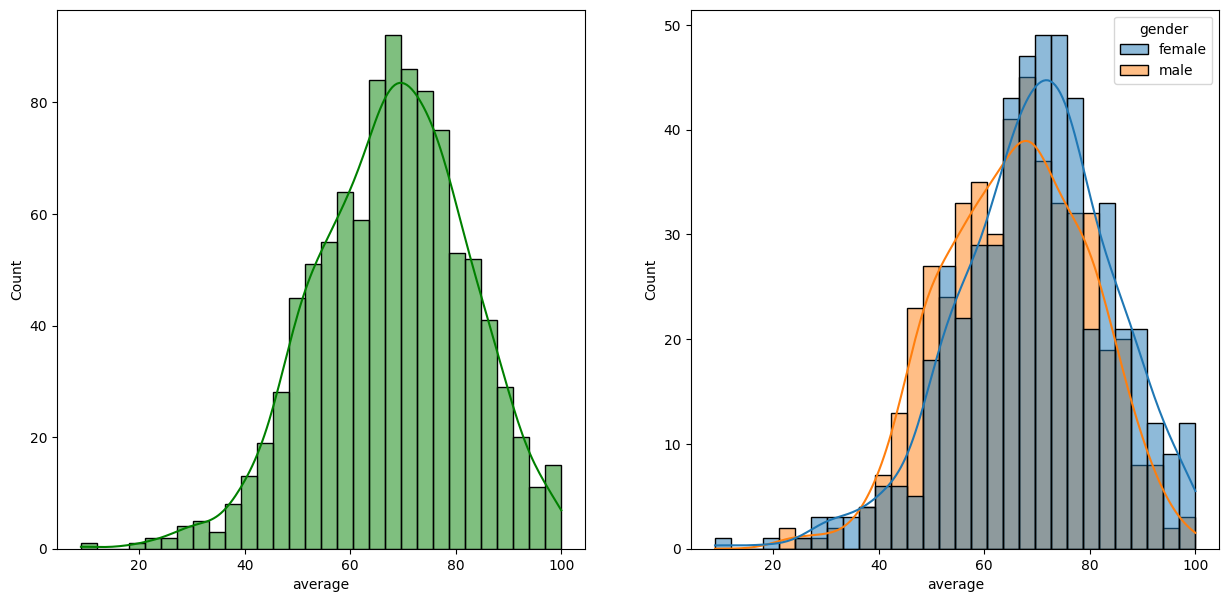

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()

- Total score

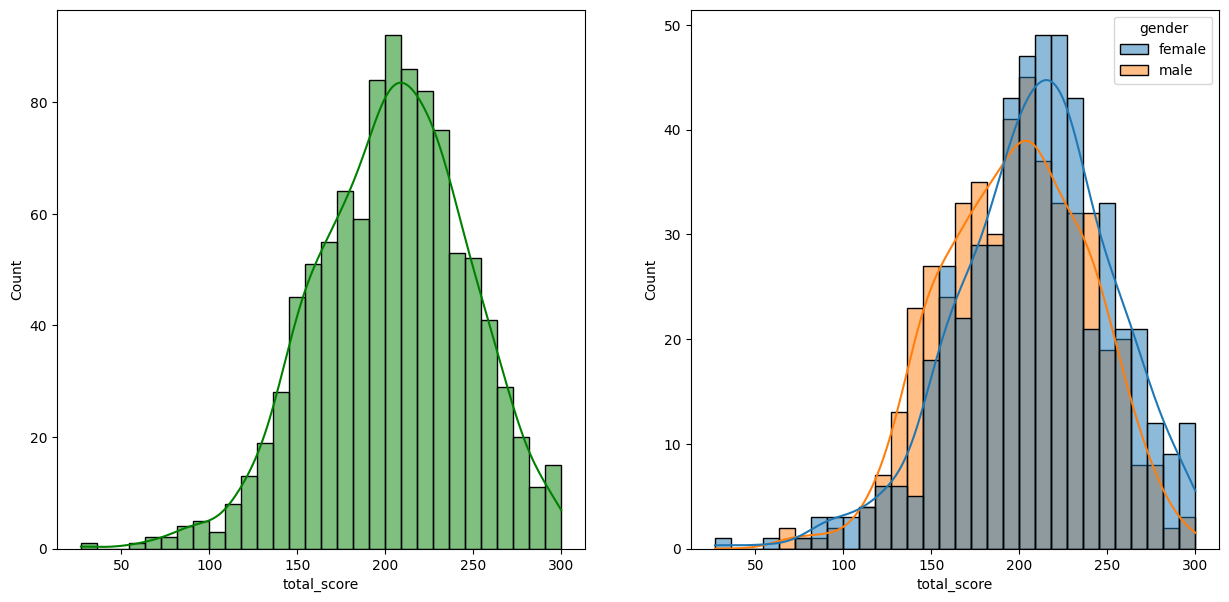

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30, kde=True, hue='gender')
plt.show()